<a href="https://colab.research.google.com/github/GildasTaliah/Solutions_with_PyNoteBook/blob/main/StatsFin01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro Statistical Finance

**Statistical Finance** is the application of (mathematical) statistical methods and models to the study of financial markets. It combines principles of finance, economics, (mathematical) statistics, and mathematics to develop quantitative methods, models and techniques to analyze financial data, encompassing: predicting the financial market, pricing asset, optimizing portfolios, making financial/investment decisions and managing financial risk.  


**Contents**

- Importing neccessary packages
- Data Visualization and Analysis
- Density Estimation of Stock Returns
- Heat Maps of Stock Returns
- Statiscal/Hypothesis test on Stock Returns  

# Import Packages

In [99]:
# Global import
import yfinance as yf
import numpy as np
import pandas as pd


# Ticker name
ticker = 'AAPL'

# Download data, auto adjust for splits and dividends
data = yf.download(ticker, start = '2008-01-01', end = '2024-10-30')
data.info()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4236 entries, 2008-01-02 00:00:00+00:00 to 2024-10-29 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  4236 non-null   float64
 1   (Close, AAPL)      4236 non-null   float64
 2   (High, AAPL)       4236 non-null   float64
 3   (Low, AAPL)        4236 non-null   float64
 4   (Open, AAPL)       4236 non-null   float64
 5   (Volume, AAPL)     4236 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 231.7 KB


In [100]:
# View head
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2008-01-02 00:00:00+00:00,5.869883,6.958571,7.152143,6.876786,7.116786,1079178800
2008-01-03 00:00:00+00:00,5.872596,6.961786,7.049643,6.881786,6.978929,842066400
2008-01-04 00:00:00+00:00,5.424310,6.430357,6.892857,6.388929,6.837500,1455832000
2008-01-07 00:00:00+00:00,5.351705,6.344286,6.557143,6.079643,6.473214,2072193200
2008-01-08 00:00:00+00:00,5.159194,6.116071,6.516429,6.100000,6.433571,1523816000


In [101]:
# Download data, auto adjust for splits and dividends
stocks = yf.download(['SPY', 'AAPL', 'AMZN', 'GOOGL', 'KO'], start = '2008-01-01', end = '2024-08-30', auto_adjust=True)
stocks.info()

[*********************100%***********************]  5 of 5 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4194 entries, 2008-01-02 00:00:00+00:00 to 2024-08-29 00:00:00+00:00
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, AAPL)    4194 non-null   float64
 1   (Close, AMZN)    4194 non-null   float64
 2   (Close, GOOGL)   4194 non-null   float64
 3   (Close, KO)      4194 non-null   float64
 4   (Close, SPY)     4194 non-null   float64
 5   (High, AAPL)     4194 non-null   float64
 6   (High, AMZN)     4194 non-null   float64
 7   (High, GOOGL)    4194 non-null   float64
 8   (High, KO)       4194 non-null   float64
 9   (High, SPY)      4194 non-null   float64
 10  (Low, AAPL)      4194 non-null   float64
 11  (Low, AMZN)      4194 non-null   float64
 12  (Low, GOOGL)     4194 non-null   float64
 13  (Low, KO)        4194 non-null   float64
 14  (Low, SPY)       4194 non-null   float64
 15  (Open, AAPL)     4194 non-null   float64
 16  (Open, AMZN)

In [102]:
stocks.head()

Price                         Close                                            \
Ticker                         AAPL    AMZN      GOOGL         KO         SPY   
Date                                                                            
2008-01-02 00:00:00+00:00  5.869882  4.8125  17.104544  18.191307  105.350334   
2008-01-03 00:00:00+00:00  5.872594  4.7605  17.108038  18.381882  105.299477   
2008-01-04 00:00:00+00:00  5.424309  4.4395  16.400829  18.417622  102.718918   
2008-01-07 00:00:00+00:00  5.351706  4.4410  16.207367  18.852381  102.631706   
2008-01-08 00:00:00+00:00  5.159194  4.3940  15.768762  18.929806  100.974365   

Price                          High                                            \
Ticker                         AAPL    AMZN      GOOGL         KO         SPY   
Date                                                                            
2008-01-02 00:00:00+00:00  6.033169  4.8715  17.408597  18.337219  106.847768   
2008-01-03 00:00:00+00:00  5.946706  4.8625  17.145982  18.492060  105.757430   
2008-01-04 00:00:00+00:00  5.814449  4.6700  16.998948  18.673712  104.267229   
2008-01-07 00:00:00+00:00  5.531261  4.5285  16.532638  18.891091  103.387682   
2008-01-08 00:00:00+00:00  5.496915  4.5915  16.474722  19.176963  103.874709   

Price                      ...      Open                                \
Ticker                     ...      AAPL    AMZN      GOOGL         KO   
Date                       ...                                           
2008-01-02 00:00:00+00:00  ...  6.003344  4.7675  17.296261  18.298508   
2008-01-03 00:00:00+00:00  ...  5.887055  4.8030  17.106291  18.215125   
2008-01-04 00:00:00+00:00  ...  5.767753  4.6630  16.967244  18.367000   
2008-01-07 00:00:00+00:00  ...  5.460463  4.4310  16.324444  18.492067   
2008-01-08 00:00:00+00:00  ...  5.427020  4.3775  16.300977  18.935761   

Price                                      Volume                        \
Ticker                            SPY        AAPL       AMZN      GOOGL   
Date                                                                      
2008-01-02 00:00:00+00:00  106.513387  1079178800  277174000  172103724   
2008-01-03 00:00:00+00:00  105.335824   842066400  182450000  129969900   
2008-01-04 00:00:00+00:00  104.194534  1455832000  205400000  214177608   
2008-01-07 00:00:00+00:00  103.082384  2072193200  199632000  255879864   
2008-01-08 00:00:00+00:00  103.278653  1523816000  245666000  213350436   

Price                                           
Ticker                           KO        SPY  
Date                                            
2008-01-02 00:00:00+00:00  15453800  204935600  
2008-01-03 00:00:00+00:00  13902600  125133300  
2008-01-04 00:00:00+00:00  18027400  232330900  
2008-01-07 00:00:00+00:00  23782000  234991000  
2008-01-08 00:00:00+00:00  20883200  326365700  

[5 rows x 25 columns]

In [103]:
stocks.tail()

Price                           Close                                     \
Ticker                           AAPL        AMZN       GOOGL         KO   
Date                                                                       
2024-08-23 00:00:00+00:00  226.590698  177.039993  165.400513  69.314804   
2024-08-26 00:00:00+00:00  226.930328  175.500000  165.939804  70.357651   
2024-08-27 00:00:00+00:00  227.779388  173.119995  164.461761  71.013161   
2024-08-28 00:00:00+00:00  226.241089  170.800003  162.634201  71.261459   
2024-08-29 00:00:00+00:00  229.537460  172.119995  161.565613  71.559418   

Price                                        High                          \
Ticker                            SPY        AAPL        AMZN       GOOGL   
Date                                                                        
2024-08-23 00:00:00+00:00  560.411072  227.969186  178.970001  165.959768   
2024-08-26 00:00:00+00:00  559.075134  227.030225  177.470001  167.327961   
2024-08-27 00:00:00+00:00  559.842834  228.598495  174.889999  166.219439   
2024-08-28 00:00:00+00:00  556.592773  229.607380  173.690002  165.380557   
2024-08-29 00:00:00+00:00  556.642578  232.664025  174.289993  165.750063   

Price                                             ...        Open              \
Ticker                            KO         SPY  ...        AAPL        AMZN   
Date                                              ...                           
2024-08-23 00:00:00+00:00  69.374393  561.368158  ...  225.412002  177.339996   
2024-08-26 00:00:00+00:00  70.437108  562.185589  ...  226.510792  176.699997   
2024-08-27 00:00:00+00:00  71.042955  560.341306  ...  225.751621  174.149994   
2024-08-28 00:00:00+00:00  71.321048  559.932566  ...  227.669510  173.690002   
2024-08-29 00:00:00+00:00  71.728258  561.956296  ...  229.847132  173.220001   

Price                                                           Volume  \
Ticker                          GOOGL         KO         SPY      AAPL   
Date                                                                     
2024-08-23 00:00:00+00:00  164.501711  68.927460  557.819047  38677300   
2024-08-26 00:00:00+00:00  166.159514  69.354533  561.457840  30602200   
2024-08-27 00:00:00+00:00  165.620228  70.834386  557.779157  35934600   
2024-08-28 00:00:00+00:00  164.821286  71.122413  559.493909  38052200   
2024-08-29 00:00:00+00:00  164.092259  71.410438  558.596606  51906300   

Price                                                              
Ticker                         AMZN     GOOGL        KO       SPY  
Date                                                               
2024-08-23 00:00:00+00:00  29150100  13955700  11834700  50639400  
2024-08-26 00:00:00+00:00  22366200  14190400  12912200  35788600  
2024-08-27 00:00:00+00:00  29842000  11821900  16988400  32693900  
2024-08-28 00:00:00+00:00  29045000  16407400  13272600  41066000  
2024-08-29 00:00:00+00:00  26407800  19699800  17201700  38715200  

[5 rows x 25 columns]

# Data Viz and Analysis

<Axes: xlabel='Date'>

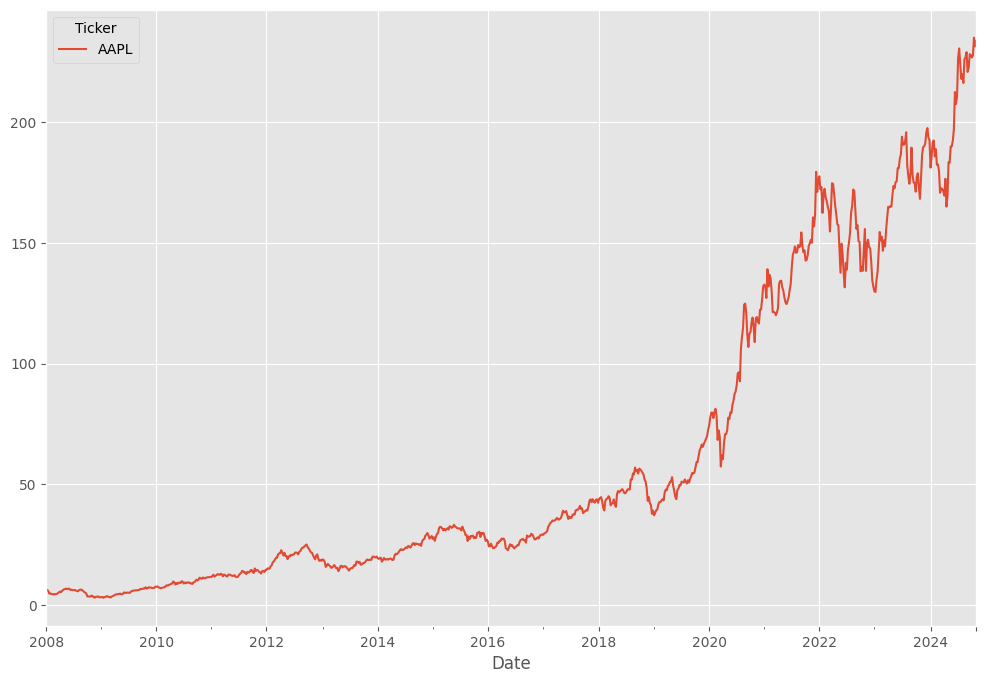

In [104]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Plot stock price evolution
data.Close.resample('W').last().plot(figsize = (12,8))


<Axes: xlabel='Date'>

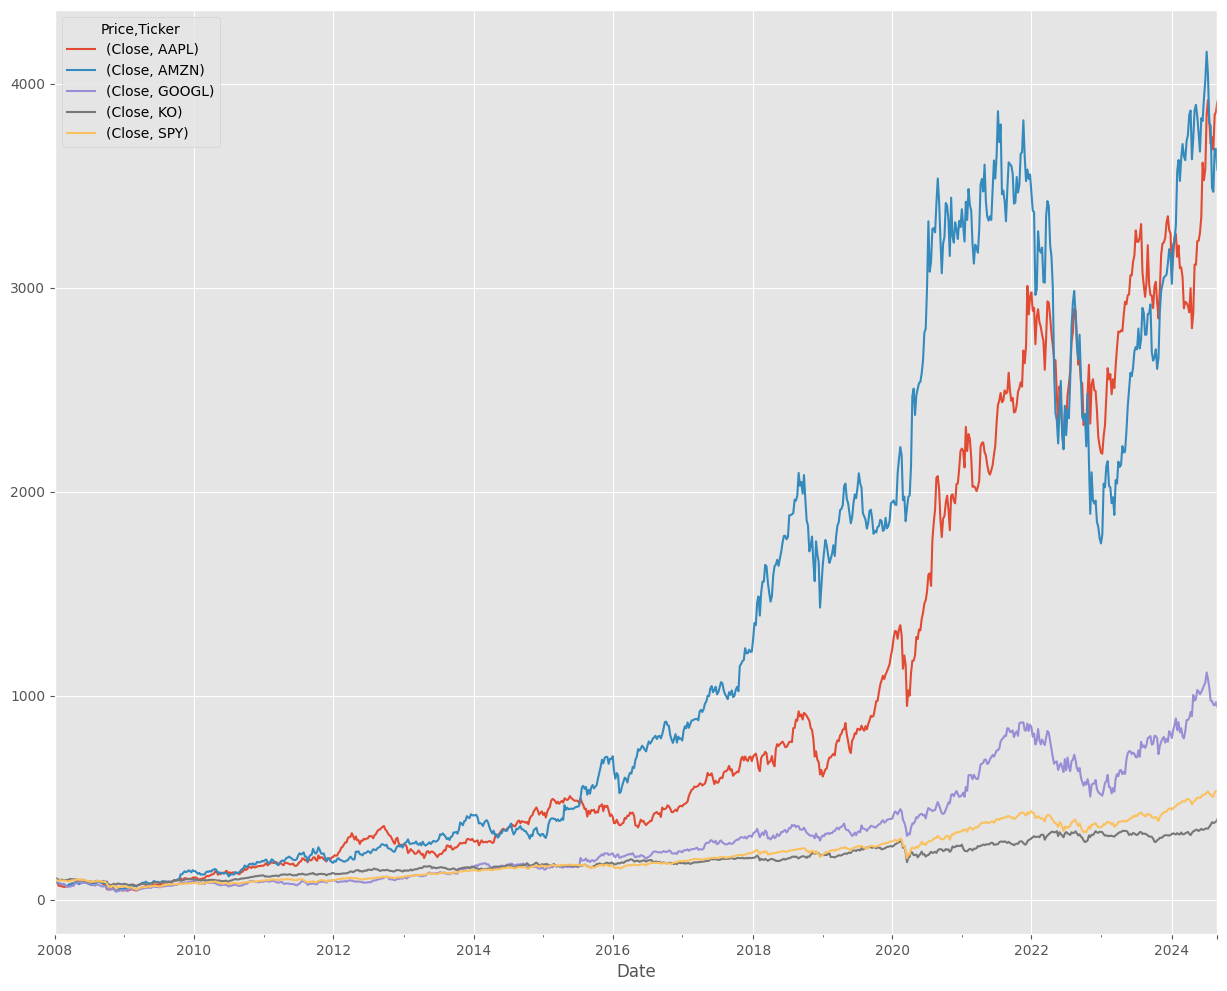

In [105]:
# Normalize and plot
stocks_cl = stocks[['Close']]
stocks_cl.div(stocks_cl.iloc[0]).mul(100).resample('W').last().plot(figsize = (15,12))

<Axes: xlabel='Date'>

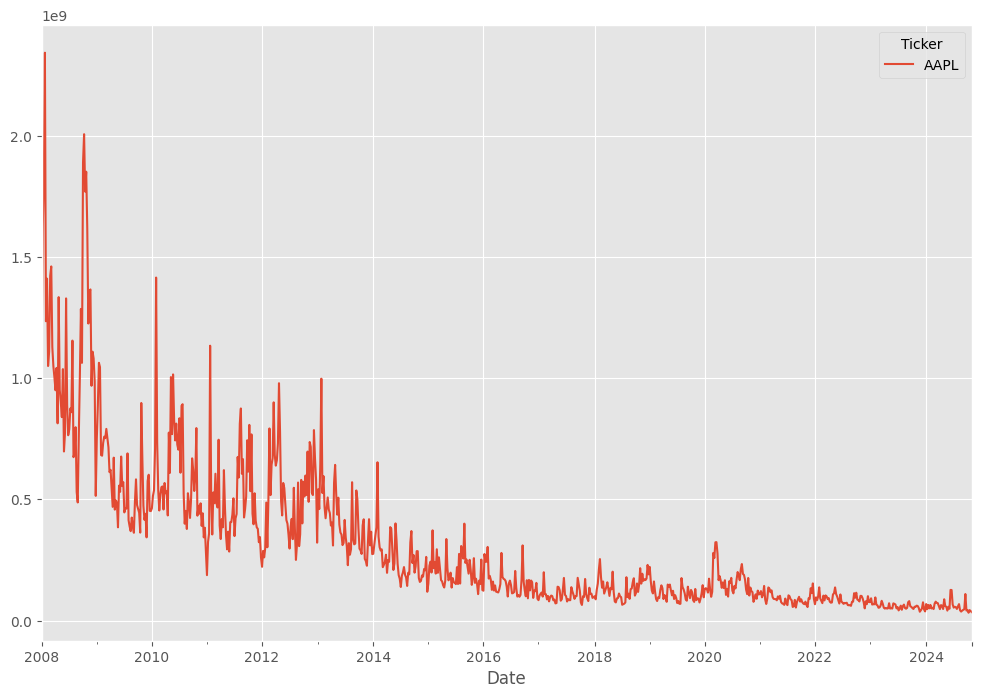

In [106]:
data.Volume.resample('W').mean().plot(figsize = (12,8))

<Axes: xlabel='Date'>

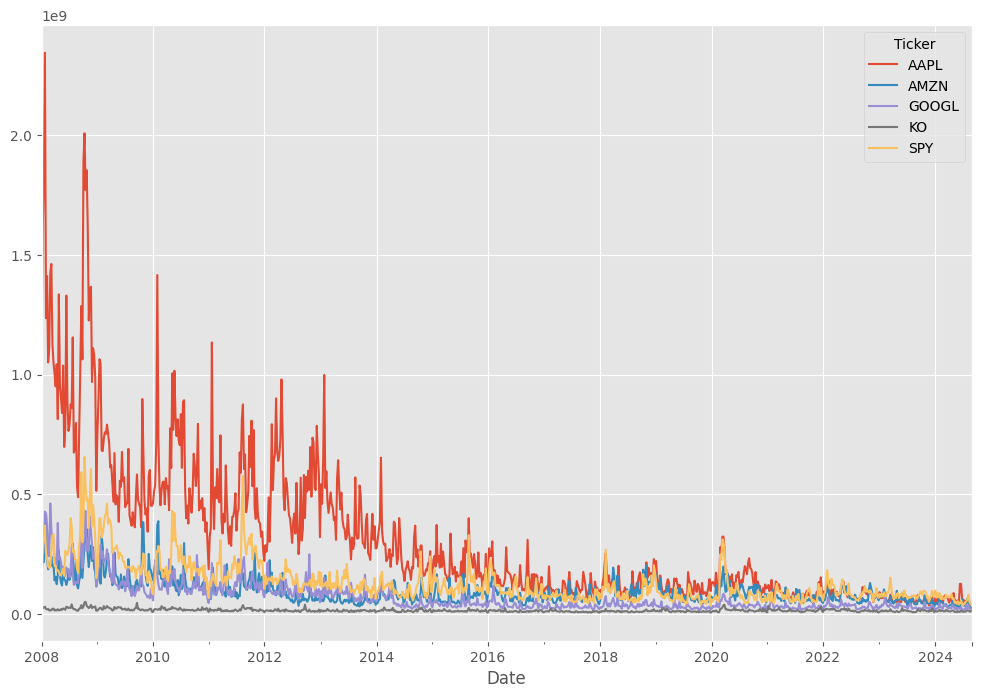

In [107]:
stocks.Volume.resample('W').mean().plot(figsize = (12,8))

In [108]:
# Display stats for Volume
stocks.Volume.describe()

Ticker,AAPL,AMZN,GOOGL,KO,SPY
count,4.194000e+03,4.194000e+03,4.194000e+03,4.194000e+03,4.194000e+03
mean,3.082660e+08,9.636386e+07,7.366292e+07,1.603238e+07,1.325538e+08
std,3.270116e+08,6.818117e+07,7.483147e+07,7.722669e+06,9.383550e+07
min,2.404830e+07,1.762600e+07,9.312000e+06,2.996300e+06,2.027000e+07
25%,9.379905e+07,5.503450e+07,2.889350e+07,1.117658e+07,7.088292e+07
50%,1.736852e+08,7.667300e+07,4.366175e+07,1.415640e+07,1.025492e+08
75%,4.177292e+08,1.154515e+08,9.175116e+07,1.867338e+07,1.623937e+08
max,3.372970e+09,1.166116e+09,9.305605e+08,1.241690e+08,8.710263e+08


In [109]:
# Compute correlation between volume and price evolution
data.columns = data.columns.get_level_values('Price').unique().tolist()
data.corr()

,Adj Close,Close,High,Low,Open,Volume
Adj Close,1.000000,0.999923,0.999829,0.999842,0.999734,-0.517618
Close,0.999923,1.000000,0.999912,0.999912,0.999811,-0.522580
High,0.999829,0.999912,1.000000,0.999884,0.999914,-0.521795
Low,0.999842,0.999912,0.999884,1.000000,0.999912,-0.523326
Open,0.999734,0.999811,0.999914,0.999912,1.000000,-0.522403
Volume,-0.517618,-0.522580,-0.521795,-0.523326,-0.522403,1.000000


In [110]:
print("Apple's Volume is negatively correlated with it's price evolution")

Apple's Volume is negatively correlated with it's price evolution


In [111]:
# Compute correlation between volume and returns
#np.corrcoef(data.Volume.iloc[1:], data.Close.pct_change().iloc[1:])

data['rets'] = data.Close.pct_change().dropna()
data.corr()
data.head()

,Adj Close,Close,High,Low,Open,Volume,rets
Date,,,,,,,
2008-01-02 00:00:00+00:00,5.869883,6.958571,7.152143,6.876786,7.116786,1079178800,NaN
2008-01-03 00:00:00+00:00,5.872596,6.961786,7.049643,6.881786,6.978929,842066400,0.000462
2008-01-04 00:00:00+00:00,5.424310,6.430357,6.892857,6.388929,6.837500,1455832000,-0.076335
2008-01-07 00:00:00+00:00,5.351705,6.344286,6.557143,6.079643,6.473214,2072193200,-0.013385
2008-01-08 00:00:00+00:00,5.159194,6.116071,6.516429,6.100000,6.433571,1523816000,-0.035972


In [112]:
'Volume is weakly negatively correlated with returns, almost zero correlations between the pair'

'Volume is weakly negatively correlated with returns, almost zero correlations between the pair'

In [113]:
stocks_cl.corr()

Price            Close                                        
Ticker            AAPL      AMZN     GOOGL        KO       SPY
Price Ticker                                                  
Close AAPL    1.000000  0.917146  0.973367  0.923915  0.965438
      AMZN    0.917146  1.000000  0.949009  0.895100  0.953691
      GOOGL   0.973367  0.949009  1.000000  0.934551  0.986275
      KO      0.923915  0.895100  0.934551  1.000000  0.969532
      SPY     0.965438  0.953691  0.986275  0.969532  1.000000

,Open,High,Low,Close,Adj Close
count,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000
mean,0.001036,0.000958,0.001015,0.001022,0.001061
std,0.020604,0.016396,0.019124,0.019545,0.019538
min,-0.145004,-0.124891,-0.198931,-0.179195,-0.179196
25%,-0.008760,-0.007216,-0.007468,-0.007972,-0.007926
50%,0.001439,0.000895,0.001865,0.000990,0.001008
75%,0.011152,0.008754,0.010251,0.011053,0.011087
max,0.219954,0.126842,0.188471,0.139049,0.139049


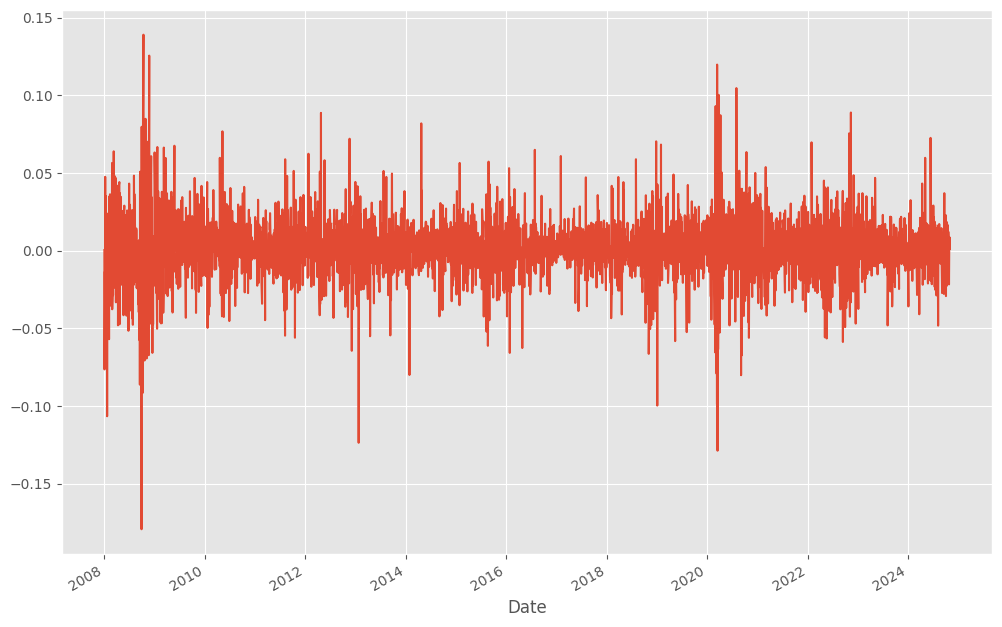

In [114]:
# Compute returns, plot and display descriptive stats
returns = data[['Open', 'High', 'Low', 'Close', 'Adj Close']].pct_change().dropna()
returns.Close.plot(figsize = (12,8))
returns.describe()

Price         Close                                                    
Ticker         AAPL         AMZN        GOOGL           KO          SPY
count   4193.000000  4193.000000  4193.000000  4193.000000  4193.000000
mean       0.001067     0.001123     0.000713     0.000399     0.000477
std        0.019590     0.023340     0.018861     0.012011     0.012663
min       -0.179195    -0.140494    -0.116342    -0.096725    -0.109424
25%       -0.007968    -0.009872    -0.007889    -0.004906    -0.004135
50%        0.001008     0.000718     0.000743     0.000654     0.000677
75%        0.011116     0.012296     0.009504     0.005980     0.005998
max        0.139050     0.267951     0.199915     0.138795     0.145198

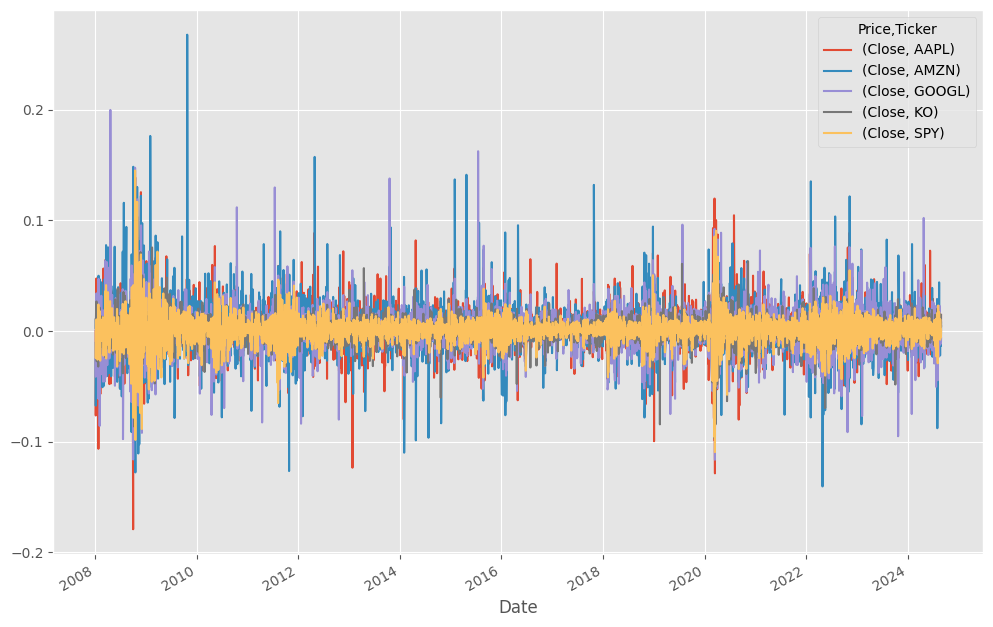

In [115]:
stocks_ret = stocks_cl.pct_change().dropna()
stocks_ret.plot(figsize = (12,8))
stocks_ret.describe()

In [116]:
tickers = stocks_cl.columns.get_level_values('Ticker').unique().tolist()
print(tickers)

stocks_ret.columns = tickers
stocks_ret.corr().style.background_gradient(cmap='coolwarm')

['AAPL', 'AMZN', 'GOOGL', 'KO', 'SPY']


,AAPL,AMZN,GOOGL,KO,SPY
AAPL,1.000000,0.508803,0.581080,0.360541,0.679311
AMZN,0.508803,1.000000,0.594481,0.286540,0.604025
GOOGL,0.581080,0.594481,1.000000,0.373807,0.687846
KO,0.360541,0.286540,0.373807,1.000000,0.619160
SPY,0.679311,0.604025,0.687846,0.619160,1.000000


In [117]:
## # Compute total return
#stocks_cl.columns = stocks_cl.columns.get_level_values('Ticker').unique().tolist()
for i in stocks_cl.columns:
  tot_ret = stocks_cl.iloc[-1][i] / stocks_cl.iloc[0][i] * 100
  print(f"Total Return for {i} is {tot_ret:.2f}% ")

Total Return for ('Close', 'AAPL') is 3910.43% 
Total Return for ('Close', 'AMZN') is 3576.52% 
Total Return for ('Close', 'GOOGL') is 944.58% 
Total Return for ('Close', 'KO') is 393.37% 
Total Return for ('Close', 'SPY') is 528.37% 


In [118]:
# Plot mean and returns
summary = stocks_ret.describe().T.iloc[:, 1:3]
summary['Returns'] = summary['mean'] * 252 * 100
summary ['Vol'] = summary['std'] * np.sqrt(252) * 100
del summary['std']
del summary['mean']
summary

,Returns,Vol
AAPL,26.890636,31.097683
AMZN,28.306286,37.050547
GOOGL,17.955007,29.940649
KO,10.050139,19.067038
SPY,12.029091,20.101455


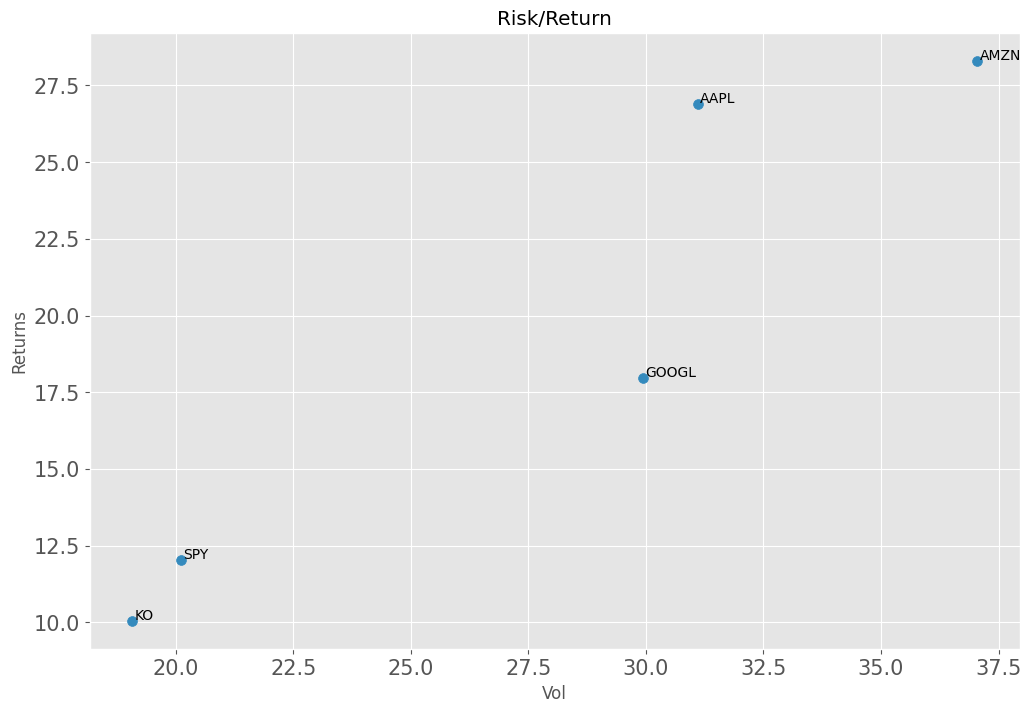

In [119]:
summary.plot.scatter(x = 'Vol', y = 'Returns', s = 50, fontsize = 15, figsize = (12,8))
for i in summary.index:
  plt.annotate(i, xy = (summary.loc[i, 'Vol'] + 0.05 , summary.loc[i, 'Returns'] + 0.05), size = 10)

plt.title('Risk/Return')
plt.show()

# Density Estimation

In [120]:
stocks_ret.head()

,AAPL,AMZN,GOOGL,KO,SPY
Date,,,,,
2008-01-03 00:00:00+00:00,0.000462,-0.010805,0.000204,0.010476,-0.000483
2008-01-04 00:00:00+00:00,-0.076335,-0.067430,-0.041338,0.001944,-0.024507
2008-01-07 00:00:00+00:00,-0.013385,0.000338,-0.011796,0.023606,-0.000849
2008-01-08 00:00:00+00:00,-0.035972,-0.010583,-0.027062,0.004107,-0.016148
2008-01-09 00:00:00+00:00,0.047591,-0.030269,0.034068,0.026742,0.010510


0.001021531435021297 0.019542363631568242


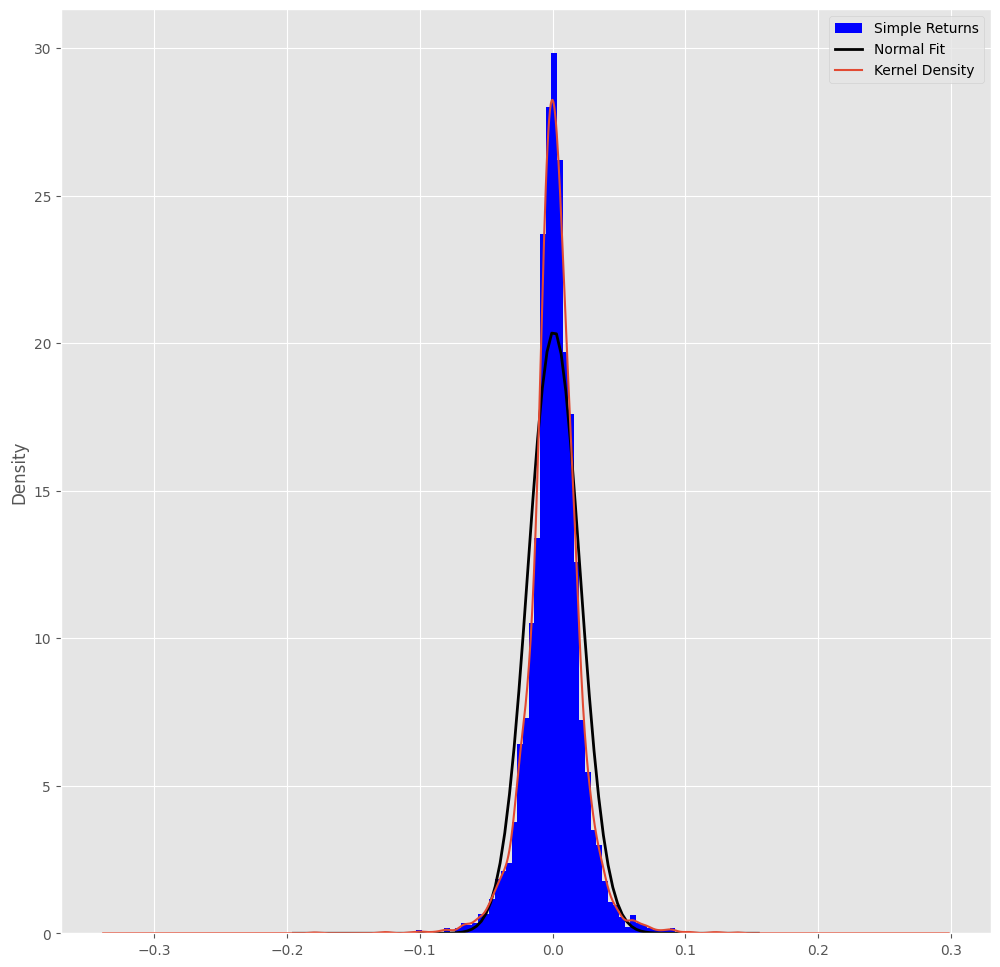

In [121]:
from scipy import stats
import seaborn as sns

# Fig size
plt.figure(figsize = (12,12))

# Plot histogram
returns.Close.hist(bins = 75, density = True, color  = 'blue', label = 'Simple Returns')

# Fit normal distribution to returns
mu, std = stats.norm.fit(returns.Close)
print(mu, std)

# Plot fitted normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth = 2, label = 'Normal Fit')

# Plot kernel density
returns.Close.plot(kind = 'kde', label = 'Kernel Density ')
plt.legend()
plt.show()

In [122]:
'The fitted normal distribution underestimate the tails and peaks, that is: the probability of extreme returns occuring \
is smaller under the normal distribution than the (kernel) estimated density'

'The fitted normal distribution underestimate the tails and peaks, that is: the probability of extreme returns occuring is smaller under the normal distribution than the (kernel) estimated density'

# Heat Maps

Heatmaps are effective for visualizing data that spans two dimension, in this case times and retiurns. They enable analyst to quickly identify periods with low and high performance, which would play a role in optimizing strategies based on hsitorical returns.

In [123]:
returns.info()
returns.columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4235 entries, 2008-01-03 00:00:00+00:00 to 2024-10-29 00:00:00+00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4235 non-null   float64
 1   High       4235 non-null   float64
 2   Low        4235 non-null   float64
 3   Close      4235 non-null   float64
 4   Adj Close  4235 non-null   float64
dtypes: float64(5)
memory usage: 198.5 KB


Index(['Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')

In [124]:
returns.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2008-01-03 00:00:00+00:00,-0.019371,-0.014331,0.000727,0.000462,0.000462
2008-01-04 00:00:00+00:00,-0.020265,-0.022240,-0.071618,-0.076335,-0.076335
2008-01-07 00:00:00+00:00,-0.053278,-0.048705,-0.048410,-0.013385,-0.013385
2008-01-08 00:00:00+00:00,-0.006124,-0.006209,0.003348,-0.035972,-0.035972
2008-01-09 00:00:00+00:00,-0.049073,-0.016223,-0.014637,0.047591,0.047591


In [126]:
# Extract year and months, convert month numbers to name
rets = returns.loc[:, 'Close'].to_frame()
#rets = rets.loc['2010':'2023']
rets['Year'] = rets.index.year
rets['Month'] = rets.index.month
rets['Month'] = rets.index.strftime('%b')
rets.head()

,Close,Year,Month
Date,,,
2008-01-03 00:00:00+00:00,0.000462,2008,Jan
2008-01-04 00:00:00+00:00,-0.076335,2008,Jan
2008-01-07 00:00:00+00:00,-0.013385,2008,Jan
2008-01-08 00:00:00+00:00,-0.035972,2008,Jan
2008-01-09 00:00:00+00:00,0.047591,2008,Jan


In [128]:
# Group data: for each year group all returns for each month and report their monthly averages
group_retrs = rets.groupby(['Year', 'Month'])['Close'].mean().unstack()

# Rename the columns to just the month names
group_retrs.columns = group_retrs.columns.get_level_values('Month')

# Get the list of unique months from the DataFrame
months = group_retrs.columns.tolist()

# Ensure the order of months is correct
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
group_retrs = group_retrs[[month for month in months_order if month in months]]

# Display the resulting DataFrame
group_retrs

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2008,-0.017337,-0.003564,0.007273,0.009106,0.004079,-0.005440,-0.002008,0.003262,-0.017356,-0.000650,-0.006640,-0.003226
2009,0.003284,-0.000103,0.007866,0.008781,0.004141,0.002277,0.006376,0.001500,0.004710,0.000959,0.003041,0.002529
2010,-0.004610,0.003437,0.006102,0.005193,-0.000415,-0.000776,0.001178,-0.002489,0.007467,0.002923,0.001683,0.001653
2011,0.002635,0.002203,-0.000457,0.000296,-0.000248,-0.001516,0.007678,-0.000276,-0.000334,0.003099,-0.002569,0.002823
2012,0.006125,0.008733,0.004670,-0.000875,-0.000333,0.000600,0.002249,0.003777,0.000252,-0.005247,-0.000523,-0.004469
2013,-0.006814,-0.001523,0.000284,0.000229,0.000806,-0.006230,0.006137,0.003482,-0.000845,0.004074,0.003162,0.000504
2014,-0.005186,0.002690,0.000964,0.004736,0.003386,0.001339,0.001359,0.003345,-0.000678,0.003096,0.005122,-0.003265
2015,0.003255,0.004935,-0.001357,0.000348,0.002102,-0.001699,-0.001403,-0.003109,-0.000842,0.003774,-0.000401,-0.005184
2016,-0.003748,-0.000233,0.005527,-0.006997,0.003098,-0.001916,0.004445,0.000813,0.003157,0.000237,-0.001198,0.002259


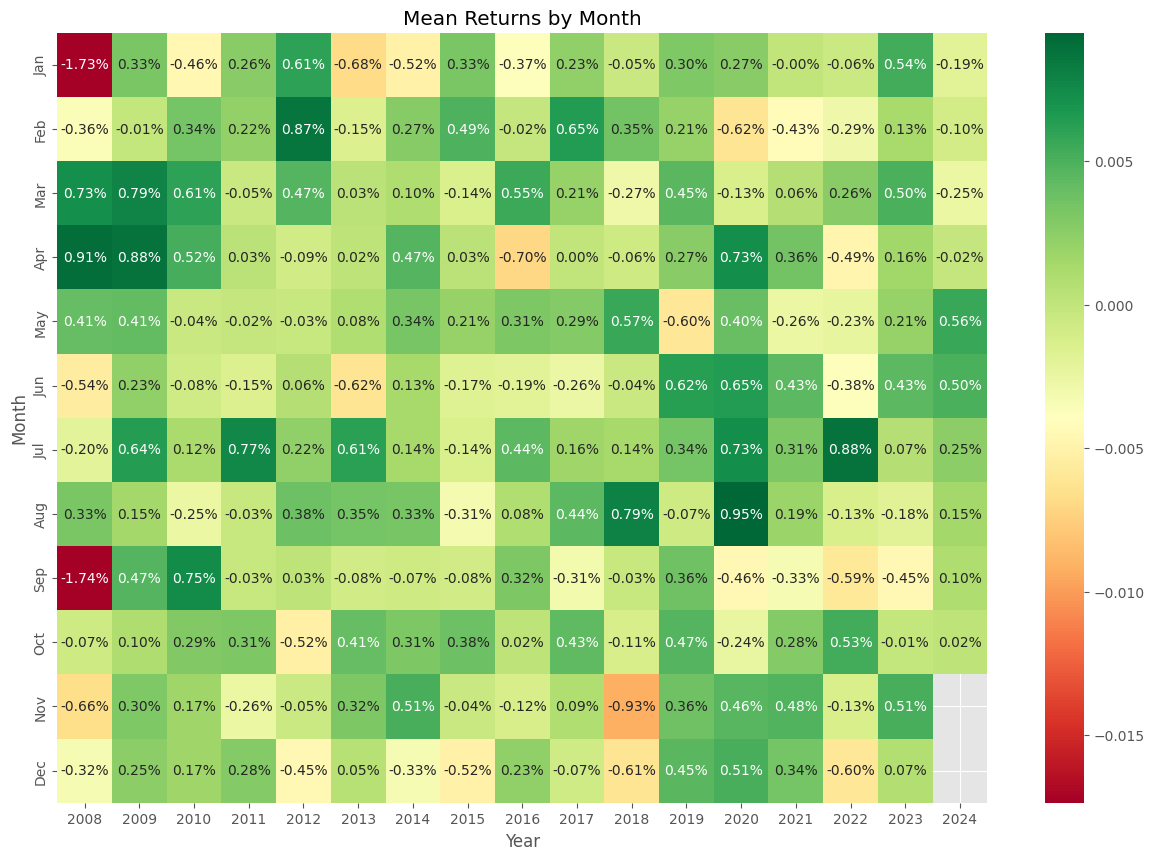

In [129]:
# Plot Heat map

plt.figure(figsize = (15,10))
sns.heatmap(group_retrs.T, cmap = 'RdYlGn', annot = True, fmt = '.2%', cbar = True)
plt.title('Mean Returns by Month')
plt.show()

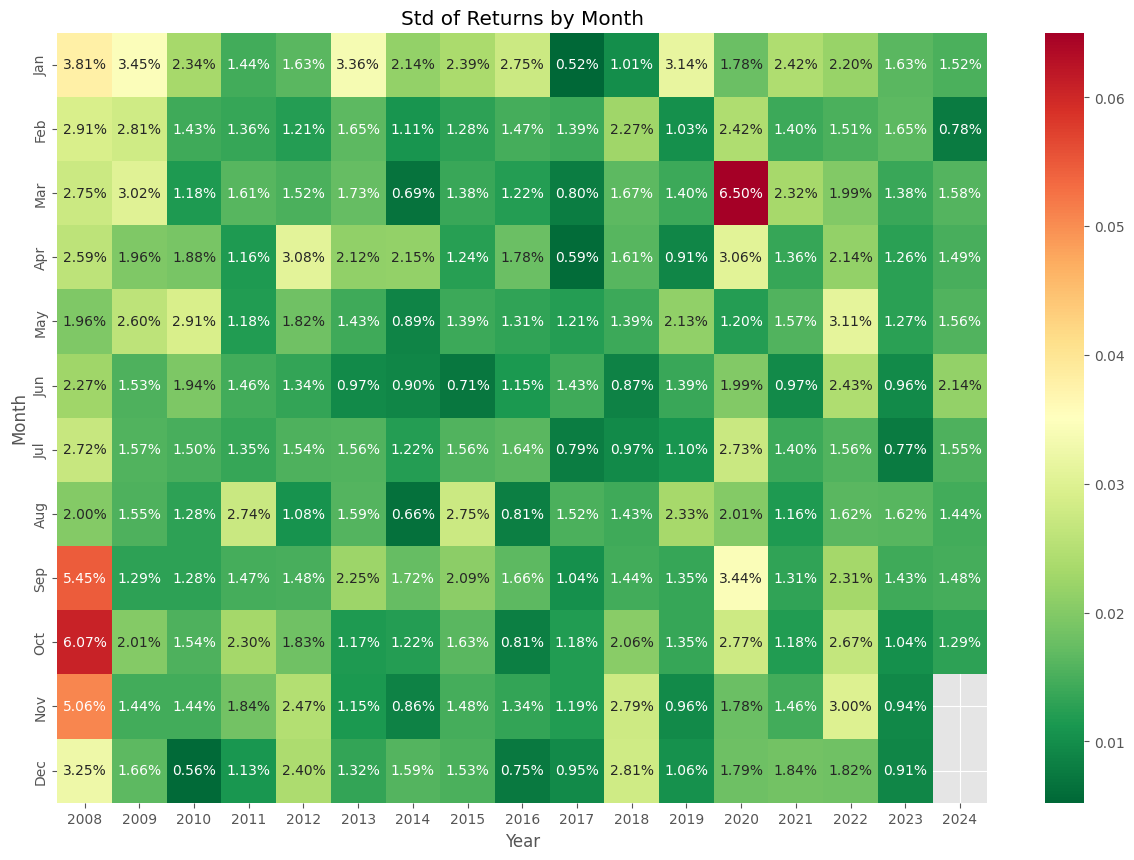

In [131]:
# Group data: for each year group all returns for each month and report their monthly standard deviation
group_std = rets.groupby(['Year', 'Month'])['Close'].std().unstack()
group_std

group_std.columns = group_std.columns.get_level_values('Month')
group_std = group_std[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

group_std

plt.figure(figsize = (15,10))
sns.heatmap(group_std.T, cmap = 'RdYlGn_r', annot = True, fmt = '.2%', cbar = True)
plt.title('Std of Returns by Month')
plt.show()

With heatmaps we can depict whether certain months show higher returns (**Seasonilty**), additionally we can identify any unsual spikes or drops that reocur annually (**Market Anomalies**) and also how the stock performance has evolved over the years, identifying period of sustained growth or decline (**Long-Term_Trends**).

With heatmaps anyalst may depict a trend that allows to them to capitalize on it. For instance, they could incresase their positions during months that historically show higher returns, and hedge their bets during months that typically underperformed. There's a common anomaly 'sell in May and go away' usually depicted in stock returns trends, but that is not quite evident here, at least for most years.

**Limitations**
Heatmaps may oversimplify the data by focusing on only the mean or standard deviation, and not capturing the full distribution of the returns within the said periods, moreover colour interpretation may be subjective and small data nuances (like non-linearity or skewnness) maybe overlooked.

# Statistical test

In [132]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm


def run_test(returns: pd.Series, sig: float=0.05, lags: float = 5) -> None:

  #1. T-Test to test if returns are significantly different from zero
  ## Null: Returns are equal to zero
  t_stat, p_value = stats.ttest_1samp(returns, 0)

  print("T-Test Results:")
  print(f'T_Stats: {t_stat:.4f}')
  print(f'P_Value: {p_value:.4f}')
  print(f"Conclusion: Returns are {'not' if p_value > sig else ''} significantly different from zero at {sig * 100:.0f}% level")

  #2. Lyung Box Q test for Autocorrelation
  ## Null: No Autocorrelation of returns at certain lag
  result = sm.stats.acorr_ljungbox(returns, lags=[lags], return_df = True).round(4)


  print("\nLyung Box Q Test Results:")
  print(f"LB Value: {result['lb_stat'].iloc[0]}")
  print(f"P_Value:  {result['lb_pvalue'].iloc[0]}")
  print(f"Conclusion: Retrurns are {'not' if result['lb_pvalue'].iloc[0] > sig else ''} significantly autocorrelated at {lags} lags")

  #3. Adfueller test for stationarity
  ## Null: Returns are non-stationary

  adf_result = adfuller(returns, autolag = 'AIC')
  print("\nADF Test Results:")
  print(f'ADF Statistic: {adf_result[0]:.4f}')
  print(f'P_Value: {adf_result[1]:.4f}')
  print(f"Conclusion:  Returns are {'not' if adf_result[1] > sig else ''} stationary at {sig * 100:.0f}% level")

In [134]:
# Statistical test for Apple returns
returns = data.Close.pct_change().dropna()
run_test(returns)

T-Test Results:
T_Stats: 3.4013
P_Value: 0.0007
Conclusion: Returns are  significantly different from zero at 5% level

Lyung Box Q Test Results:
LB Value: 13.4606
P_Value:  0.0194
Conclusion: Retrurns are  significantly autocorrelated at 5 lags

ADF Test Results:
ADF Statistic: -15.7622
P_Value: 0.0000
Conclusion:  Returns are  stationary at 5% level


In [139]:
# The End!!